In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15174 entries, 0 to 15173
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Period Code  15151 non-null  object
 1   Cycle ID     15141 non-null  object
 2   B_2          15136 non-null  object
 3   B_3          15141 non-null  object
 4   B_4          15141 non-null  object
 5   B_5          15143 non-null  object
 6   B_9          15142 non-null  object
 7   B_10         15134 non-null  object
 8   B_14         15141 non-null  object
 9   B_15         15135 non-null  object
 10  B_16         15140 non-null  object
 11  B_17         15140 non-null  object
 12  B_18         15140 non-null  object
 13  B_19         15146 non-null  object
 14  B_20         15145 non-null  object
 15  B_21         15145 non-null  object
 16  B_22         15146 non-null  object
 17  B_23         15150 non-null  object
 18  B_24         15138 non-null  object
 19  B_25         15139 non-nu

In [3]:
df.head()

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,03/01/2020 00:00,0
1,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,03/01/2020 00:10,0
2,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,03/01/2020 00:15,0
3,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,03/01/2020 00:20,0
4,1,6,-0.0043,-0.0001,100,518.67,14.62,21.61,1.3,47.16,...,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669,03/01/2020 00:25,0


In [4]:
df[df.duplicated(['Period Code', 'Cycle ID'])]

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad
138,1,Missing,-0.0037,0.0001,100,518.67,14.62,21.61,1.3,47.22,...,8129.71,8.421,0.03,392,2388,100,39.03,23.422,03/01/2020 01:35,0
139,1,Missing,0,-0.0004,100,518.67,14.62,21.61,1.3,47.33,...,8131.03,8.3784,0.03,392,2388,100,38.84,23.3769,03/01/2020 03:15,0
485,3,Missing,-0.0002,0,100,518.67,14.62,21.61,1.3,47.33,...,8138.36,8.3716,0.03,392,2388,100,39,23.3813,03/02/2020 19:55,0
620,4,no connection,0.0002,0.0002,No Data,518.67,14.62,21.61,1.3,47.41,...,8148.95,8.4458,0.03,395,2388,100,38.96,23.3211,03/03/2020 17:10,0
956,6,no response,0.0012,-0.0004,100,518.67,14.62,21.61,1.3,47.6,...,8126.08,8.4614,0.03,393,2388,100,38.73,23.3138,03/04/2020 21:40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15100,start,151,-0.0008,-0.0001,100,518.67,14.62,21.61,1.3,47.66,...,8135.52,8.4295,0.03,393,2388,100,38.83,23.2362,04/11/2020 23:40,0
15122,stop,57,-0.0016,-0.0001,100,518.67,14.62,21.61,1.3,47.46,...,8129.29,8.4397,0.03,393,2388,100,38.93,23.2477,04/09/2020 06:35,0
15131,stop,97,-0.0038,0.0003,100,518.67,14.62,21.61,1.3,47.34,...,8145.4,8.4526,0.03,393,2388,100,38.92,23.3804,05/05/2020 19:20,0
15133,stop,99,-0.0002,0,100,518.67,14.62,21.61,1.3,47.37,...,8158.96,8.381,0.03,389,2388,100,38.9,23.3256,04/04/2020 17:56,0


In [5]:
print(df['Period Code'].unique())
print(df['Cycle ID'].unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 'Bad' 'I/O' 'Missing' 'no connection' 'No Data' 'no response' 'start'
 'stop' nan]
['1' '3' '4' '5' '6' '9' '11' '13' '15' '16' '18' '19' '24' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '42' '43' '44' '45' '46'
 '47' '48' '49' '50' '51' '52' '53' '54' '57' '58' '59' '60' '62' '63'
 '64' '65' '67' '68' '69' '70' '71' '72' '74' '76' '77' '80' '81' '82'
 '83' '84' '85' '86' '88' '89' '90' '92' '93' '94' '95' '96' '97' '98'
 '100' '101' '103' '104' '105' '106' '108' '109' '110' '11

In [6]:
to_remove_lst = ['Bad', 'I/O', 'Missing', 'no connection', 'No Data', 'no response',
       'start', 'stop']

In [7]:
clean_df = df[df['Period Code'].isin(to_remove_lst) == False]
clean_df = clean_df[clean_df['Cycle ID'].isin(to_remove_lst)==False]

In [8]:
clean_df = clean_df.dropna(subset=['Period Code', 'Cycle ID'])

In [9]:
len(clean_df[clean_df.duplicated(['Period Code', 'Cycle ID'])])

0

In [10]:
clean_df.head()

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,03/01/2020 00:00,0
1,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,03/01/2020 00:10,0
2,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,03/01/2020 00:15,0
3,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,03/01/2020 00:20,0
4,1,6,-0.0043,-0.0001,100,518.67,14.62,21.61,1.3,47.16,...,8132.85,8.4108,0.03,391,2388,100,38.98,23.3669,03/01/2020 00:25,0


In [11]:
len(clean_df)

14610

In [12]:
len(df)

15174

In [13]:
clean_df.isnull().sum()

Period Code     0
Cycle ID        0
B_2            38
B_3            32
B_4            33
B_5            31
B_9            30
B_10           37
B_14           29
B_15           39
B_16           34
B_17           30
B_18           31
B_19           26
B_20           29
B_21           28
B_22           28
B_23           21
B_24           36
B_25           32
timestamp       0
Good/Bad        0
dtype: int64

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 14880
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Period Code  14610 non-null  object
 1   Cycle ID     14610 non-null  object
 2   B_2          14572 non-null  object
 3   B_3          14578 non-null  object
 4   B_4          14577 non-null  object
 5   B_5          14579 non-null  object
 6   B_9          14580 non-null  object
 7   B_10         14573 non-null  object
 8   B_14         14581 non-null  object
 9   B_15         14571 non-null  object
 10  B_16         14576 non-null  object
 11  B_17         14580 non-null  object
 12  B_18         14579 non-null  object
 13  B_19         14584 non-null  object
 14  B_20         14581 non-null  object
 15  B_21         14582 non-null  object
 16  B_22         14582 non-null  object
 17  B_23         14589 non-null  object
 18  B_24         14574 non-null  object
 19  B_25         14578 non-nu

In [15]:
sensor_columns = ['B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
       'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22',
       'B_23', 'B_24', 'B_25']

In [16]:
for each_col in sensor_columns:
    clean_df.loc[clean_df[each_col].isin(to_remove_lst), each_col] = np.nan
    clean_df[each_col] = pd.to_numeric(clean_df[each_col])

In [17]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
B_2,14336.0,-0.000029,2.188404e-03,-0.0084,-0.001500,0.00000,0.0014,0.0087
B_3,14326.0,0.000003,2.939853e-04,-0.0006,-0.000275,0.00000,0.0003,0.0006
B_4,14338.0,100.000000,0.000000e+00,100.0000,100.000000,100.00000,100.0000,100.0000
B_5,14315.0,518.670000,6.127935e-11,518.6700,518.670000,518.67000,518.6700,518.6700
B_9,14318.0,14.620000,2.840494e-12,14.6200,14.620000,14.62000,14.6200,14.6200
B_10,14317.0,21.609805,1.382350e-03,21.6000,21.610000,21.61000,21.6100,21.6100
B_14,14329.0,1.300000,3.510648e-13,1.3000,1.300000,1.30000,1.3000,1.3000
B_15,14332.0,47.541154,2.674090e-01,46.8600,47.350000,47.51000,47.7000,48.5300
B_16,14339.0,521.414897,7.397439e-01,518.6900,520.950000,521.48000,521.9550,523.3800
B_17,14328.0,2388.096101,7.230591e-02,2387.8800,2388.040000,2388.09000,2388.1400,2388.3900


In [18]:
clean_df.corr()

/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_3313/1437785805.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_df.corr()


,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad
B_2,1.000000,0.011214,NaN,NaN,NaN,-0.001672,NaN,0.016237,-0.003206,0.001519,-0.000220,0.011304,NaN,0.008030,NaN,NaN,-0.006133,-0.012671,0.012333
B_3,0.011214,1.000000,NaN,NaN,NaN,0.016118,NaN,0.014379,-0.012991,0.021364,-0.010570,0.017193,NaN,0.011290,NaN,NaN,-0.011404,-0.007384,0.010655
B_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_10,-0.001672,0.016118,NaN,NaN,NaN,1.000000,NaN,0.158828,-0.155797,0.157933,-0.004152,0.149640,NaN,0.132709,NaN,NaN,-0.143235,-0.135541,0.059311
B_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_15,0.016237,0.014379,NaN,NaN,NaN,0.158828,NaN,1.000000,-0.847403,0.785843,0.153543,0.781710,NaN,0.724634,NaN,NaN,-0.771239,-0.774388,0.667237
B_16,-0.003206,-0.012991,NaN,NaN,NaN,-0.155797,NaN,-0.847403,1.000000,-0.791248,-0.086811,-0.767050,NaN,-0.706650,NaN,NaN,0.750804,0.757217,-0.641899
B_17,0.001519,0.021364,NaN,NaN,NaN,0.157933,NaN,0.785843,-0.791248,1.000000,-0.162295,0.700889,NaN,0.630126,NaN,NaN,-0.687491,-0.691749,0.547688


In [19]:
same_val_lst = ['B_4','B_5','B_9','B_14','B_20','B_22','B_23']

In [20]:
clean_df = clean_df.drop(axis=1, columns=same_val_lst)

/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_3313/1486705323.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), annot=True)


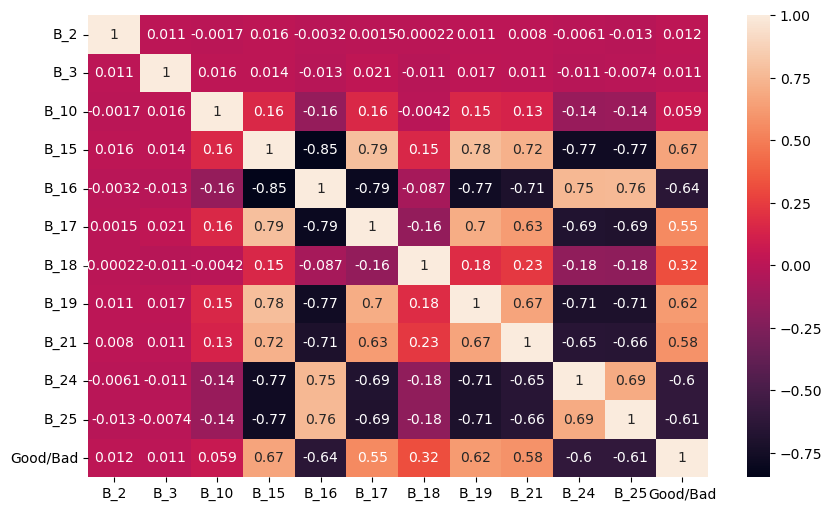

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(clean_df.corr(), annot=True)
plt.show()

In [22]:
clean_df.columns

Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_10', 'B_15', 'B_16', 'B_17',
       'B_18', 'B_19', 'B_21', 'B_24', 'B_25', 'timestamp', 'Good/Bad'],
      dtype='object')

In [23]:
for col in clean_df.columns[2:-2]:
    clean_df[col] = clean_df[col].fillna(clean_df.groupby('Period Code')[col].transform('mean'))

In [24]:
clean_df.isna().sum()

Period Code    0
Cycle ID       0
B_2            0
B_3            0
B_10           0
B_15           0
B_16           0
B_17           0
B_18           0
B_19           0
B_21           0
B_24           0
B_25           0
timestamp      0
Good/Bad       0
dtype: int64

In [25]:
clean_df.to_csv('clean_train.csv')

In [26]:
len(clean_df)

14610

In [27]:
clean_df['Good/Bad'].unique()

array([0, 1])